#  Test AutoEncoding with force_torque_sensor

--------------------------------------------------------------------

Datasets paper: https://arxiv.org/pdf/1807.06749.pdf

Download: https://ibm.ent.box.com/s/vw4y576xlz6ujblpl3gz9c5ttu51qc18



In [8]:
import numpy as np 

sides_3 = np.load('../data/force_torque_sensor/Dataset/3_sides/Data/data.npy')
sides_4 = np.load('../data/force_torque_sensor/Dataset/4_sides/Data/data.npy')
sides_5 = np.load('../data/force_torque_sensor/Dataset/5_sides/Data/data.npy')
sides_6 = np.load('../data/force_torque_sensor/Dataset/6_sides/Data/data.npy')
sides_200 = np.load('../data/force_torque_sensor/Dataset/200_sides/Data/data.npy')


import numpy as np 
from collections import namedtuple
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import plotly


/home/jim/anaconda2/envs/clustering/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
import torch.nn.functional as F


from models import AE

import numpy as np


print(torch.cuda.is_available() )

True


In [6]:
import torch
ae = torch.load('ae.pkl').cuda()
print(ae)

AE(
  (encoder): Encoder(
    (fc1): Linear(in_features=12, out_features=8, bias=True)
    (fc2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (fc3): Linear(in_features=2, out_features=8, bias=True)
    (fc4): Linear(in_features=8, out_features=12, bias=True)
  )
)


In [9]:
test_data = sides_3[0]
print(test_data)

[-8.47151862e-03 -8.44647365e-03 -1.92757998e-05 -8.72229118e-02
 -8.22633362e-01  4.80666690e-02 -3.33000795e-02 -5.22700006e-02
 -7.75166669e-02  8.91666770e-03  1.00000000e+00  7.11917877e-04]


In [11]:
import torch.utils.data

test_loader = torch.from_numpy(test_data).cuda().float()
print(test_loader)

tensor([-8.4715e-03, -8.4465e-03, -1.9276e-05, -8.7223e-02, -8.2263e-01,
         4.8067e-02, -3.3300e-02, -5.2270e-02, -7.7517e-02,  8.9167e-03,
         1.0000e+00,  7.1192e-04], device='cuda:0')


In [14]:
latent = ae.encoder(test_loader)
print(latent)
output = ae.decoder(latent).detach().cpu().numpy()

print (output)

tensor([1.9647, 0.0000], device='cuda:0', grad_fn=<ReluBackward0>)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.0510645  0.43657076]


In [16]:
slides_3_generate = []
latent_space = []

for test in sides_3:
    test_loader = torch.from_numpy(test).cuda().float()
    latent = ae.encoder(test_loader)
    output = ae.decoder(latent).detach().cpu().numpy()
    
    slides_3_generate.append(output)
    latent_space.append(latent.detach().cpu().numpy())
    

print (len(slides_3_generate))

np.save('slides_3_generate.npy',slides_3_generate)
np.save('latent_space.npy',latent_space)

1585353


In [17]:
print(type(slides_3_generate))

<class 'list'>


In [23]:
slides_3_generate = np.array(slides_3_generate)
print(slides_3_generate[1585352])

[   0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.      1584.0922    10.24158]


1585353


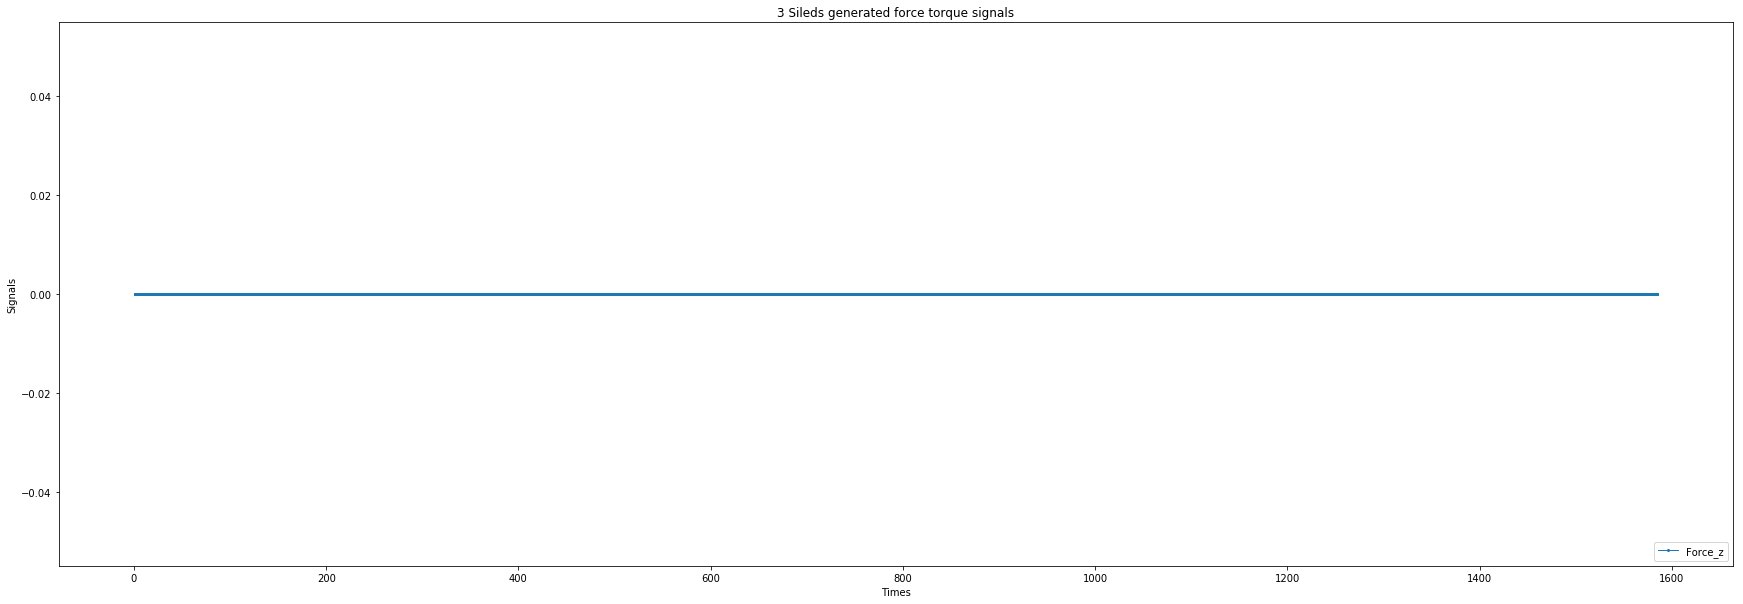

In [24]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

cmap=plt.cm.get_cmap(plt.cm.viridis,143)


# plt.rcParams['font.size'] = 11.
# plt.rcParams['font.family'] = 'Comic Sans MS'
# plt.rcParams['axes.labelsize'] = 15.
# plt.rcParams['xtick.labelsize'] = 10.
# plt.rcParams['ytick.labelsize'] = 10.

plt.figure(figsize=(30,10))



sides = slides_3_generate
print(len(sides))

Force_x = sides[:,0] 
Force_y = sides[:,1]
Force_z = sides[:,2]
Moment_x = sides[:,3]
Moment_y = sides[:,4]
Moment_z = sides[:,5]
Peg_Position_x = sides[:,6]
Peg_Position_y = sides[:,7]
Peg_Position_z = sides[:,8]
Angle = sides[:,9]
Time = sides[:,10]
Counter = sides[:,11]


# plt.plot(Time, Force_x, marker='s', linestyle='-', markersize=2, linewidth=1, label='Force_x')
# plt.plot(Time, Force_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_y')
plt.plot(Time, Force_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_z')

# plt.plot(Time, Moment_x, marker='o', linestyle='-', label='Moment_x')
# plt.plot(Time, Moment_y, marker='o', linestyle='-', label='Moment_y')
# plt.plot(Time, Moment_z, marker='o', linestyle='-', label='Moment_z')

# plt.plot(Time, Peg_Position_x, marker='o', linestyle='-', label='Peg_Position_x')
# plt.plot(Time, Peg_Position_y, marker='o', linestyle='-', label='Peg_Position_y')
# plt.plot(Time, Peg_Position_z, marker='o', linestyle='-', label='Peg_Position_z')

# plt.plot(Time, Angle, marker='o', linestyle='-', label='Angle')
# plt.plot(Time, Counter, marker='o', linestyle='-', label='Counter')


plt.xlabel('Times')
plt.ylabel('Signals')
plt.title('3 Sileds generated force torque signals')
plt.legend(loc='lower right')
plt.show()